In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import networkx as nx
import os
%matplotlib inline
os.chdir('E:\mining\HOC\KÌ 1 NĂM 3\ĐỀ ÁN THỰC HÀNH 1')

In [2]:
data=pd.read_csv('bread basket.csv')

In [3]:
data.shape

(20507, 5)

In [4]:
data.head(5)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
data.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [8]:
data['Item'].nunique()

94

In [9]:
print('Uniquue Items: ',"\n", data['Item'].unique())

Uniquue Items:  
 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbrea

In [10]:
count = data['Item'].value_counts().sort_values(ascending=False)
count

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

In [11]:
data['Item'].value_counts().sort_values(ascending=False).head(15)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Name: Item, dtype: int64

In [12]:
data["Year"]=pd.to_datetime(data["date_time"]).dt.year
data["Month"]=pd.to_datetime(data["date_time"]).dt.month
data["Week Day"]=pd.to_datetime(data["date_time"]).dt.weekday
data["Hour"]=pd.to_datetime(data["date_time"]).dt.hour

In [13]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Week Day,Hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016,10,6,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016,10,6,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016,10,6,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016,10,6,10
4,3,Jam,30-10-2016 10:07,morning,weekend,2016,10,6,10


In [14]:
data["Month"]=data["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))
data["Week Day"]=data["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))
data.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,Week Day,Hour
0,1,Bread,30-10-2016 09:58,morning,weekend,2016,October,Sunday,9
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016,October,Sunday,10
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016,October,Sunday,10
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016,October,Sunday,10
4,3,Jam,30-10-2016 10:07,morning,weekend,2016,October,Sunday,10
5,3,Cookies,30-10-2016 10:07,morning,weekend,2016,October,Sunday,10
6,4,Muffin,30-10-2016 10:08,morning,weekend,2016,October,Sunday,10
7,5,Coffee,30-10-2016 10:13,morning,weekend,2016,October,Sunday,10
8,5,Pastry,30-10-2016 10:13,morning,weekend,2016,October,Sunday,10
9,5,Bread,30-10-2016 10:13,morning,weekend,2016,October,Sunday,10


In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [16]:
transaction_list=[]
for i in data['Transaction'].unique():
    tlist=list(set(data[data['Transaction']==i]['Item']))
    if len(tlist) > 0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [17]:
transaction_list

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Pastry', 'Coffee', 'Bread'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Pastry', 'Coffee', 'Tea', 'Medialuna'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna'],
 ['Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Pastry', 'Tea', 'Tartine'],
 ['Basket', 'Coffee', 'Bread'],
 ['Pastry', 'Medialuna', 'Bread'],
 ['Scandinavian', 'Mineral water'],
 ['Medialuna', 'Coffee', 'Bread'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Medialuna', 'Bread'],
 ['Bread', 'Coffee', 'Medialuna'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Jam', 'Bread'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Juice', 'Coffee', 'Muffin', 'Tartine'],
 ['Scandinavia

In [18]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [19]:
df.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#result.drop(['index'],axis = 1, inplace = True)
#result

### Chúng ta mong muốn sẽ có luật cho một số đơn hàng được mua ít nhất 15 lần trong 1 tháng. Dữ liệu có 9465 đơn hàng đã được bán trong 6 tháng. Vì thế có thể cho trung bình bán được hơn 1500 đơn hàng. 
### Độ hỗ trợ tối thiểu có thể được tính là 15 /1500 = 0.01 

In [21]:
frequent_itemsets1 = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Coffee, Cake, Bread)"
59,0.011199,"(Pastry, Coffee, Bread)"


In [22]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets1, metric="lift", min_threshold=1.0)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))

In [23]:
frequent_itemsets1

,support,itemsets,length
0,0.036344,(Alfajores),1
1,0.016059,(Baguette),1
2,0.327205,(Bread),1
3,0.040042,(Brownie),1
4,0.103856,(Cake),1
...,...,...,...
56,0.023666,"(Coffee, Toast)",2
57,0.014369,"(Tea, Sandwich)",2
58,0.010037,"(Coffee, Cake, Bread)",3
59,0.011199,"(Pastry, Coffee, Bread)",3


In [24]:
frequent_itemsets1_length= frequent_itemsets1.groupby('length').size()
frequent_itemsets1_length

length
1    30
2    28
3     3
dtype: int64

In [25]:
frequent_itemsets1_length1 = frequent_itemsets1[frequent_itemsets1.length == 1]
frequent_itemsets1_length1.sort_values('support',ascending=False).head(15)
#in 15 đầu 

,support,itemsets,length
6,0.478394,(Coffee),1
2,0.327205,(Bread),1
26,0.142631,(Tea),1
4,0.103856,(Cake),1
19,0.086107,(Pastry),1
21,0.071844,(Sandwich),1
16,0.061807,(Medialuna),1
12,0.058320,(Hot chocolate),1
8,0.054411,(Cookies),1
3,0.040042,(Brownie),1


In [26]:
frequent_itemsets1_length1 = frequent_itemsets1[frequent_itemsets1.length == 1]
frequent_itemsets1_length1.sort_values('support',ascending=False).tail(15)
#in 15 sau

,support,itemsets,length
24,0.034443,(Soup),1
28,0.033597,(Toast),1
22,0.029054,(Scandinavian),1
29,0.020285,(Truffles),1
7,0.019440,(Coke),1
25,0.018172,(Spanish Brunch),1
1,0.016059,(Baguette),1
27,0.015425,(Tiffin),1
13,0.015003,(Jam),1
10,0.015003,(Fudge),1


In [27]:
frequent_itemsets1_length2 = frequent_itemsets1[frequent_itemsets1.length == 2]
frequent_itemsets1_length2.sort_values('support',ascending=False).head(14)

,support,itemsets,length
34,0.090016,"(Coffee, Bread)",2
42,0.054728,"(Coffee, Cake)",2
55,0.049868,"(Coffee, Tea)",2
50,0.047544,"(Pastry, Coffee)",2
51,0.038246,"(Coffee, Sandwich)",2
48,0.035182,"(Coffee, Medialuna)",2
46,0.029583,"(Hot chocolate, Coffee)",2
38,0.029160,"(Pastry, Bread)",2
45,0.028209,"(Coffee, Cookies)",2
40,0.028104,"(Tea, Bread)",2


In [28]:
frequent_itemsets1_length2 = frequent_itemsets1[frequent_itemsets1.length == 2]
frequent_itemsets1_length2.sort_values('support',ascending=False).tail(14)

,support,itemsets,length
31,0.019651,"(Coffee, Alfajores)",2
41,0.019651,"(Coffee, Brownie)",2
49,0.018806,"(Coffee, Muffin)",2
52,0.018067,"(Coffee, Scone)",2
39,0.017010,"(Sandwich, Bread)",2
37,0.016904,"(Medialuna, Bread)",2
53,0.015848,"(Soup, Coffee)",2
35,0.014474,"(Cookies, Bread)",2
57,0.014369,"(Tea, Sandwich)",2
36,0.013418,"(Hot chocolate, Bread)",2


In [29]:
frequent_itemsets1_length3 = frequent_itemsets1[frequent_itemsets1.length == 3]
frequent_itemsets1_length3.sort_values('support',ascending=False)

,support,itemsets,length
59,0.011199,"(Pastry, Coffee, Bread)",3
58,0.010037,"(Coffee, Cake, Bread)",3
60,0.010037,"(Coffee, Tea, Cake)",3


In [30]:
print(len(rules))

42


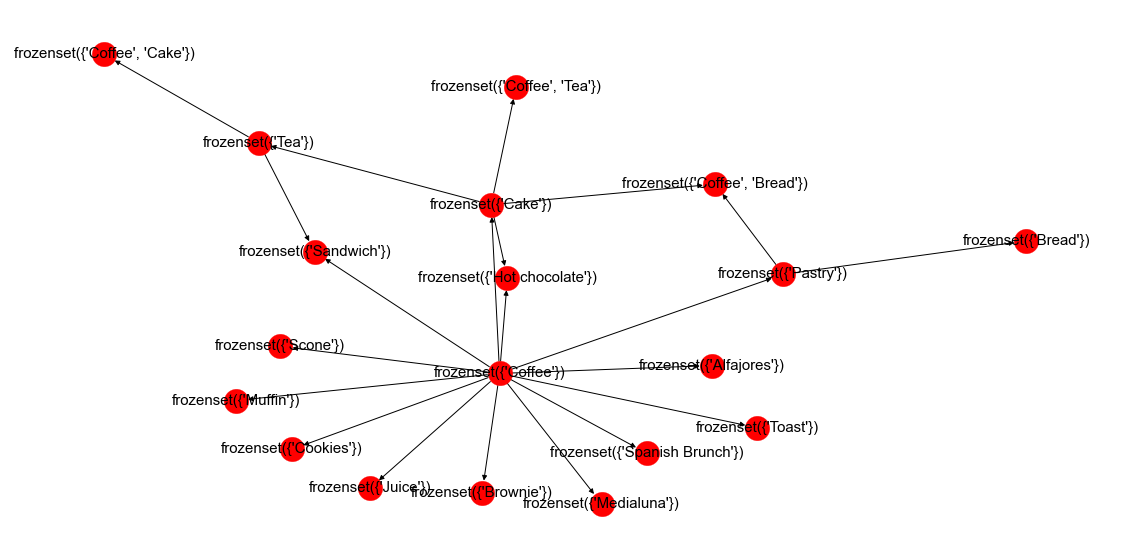

In [31]:
fig , ax=plt.subplots(figsize=(20,10))
RUlE=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(RUlE,arrows=True,with_labels=True, font_size = 15, node_size = 600,
        font_color = 'black', node_color = 'red')
plt.show()

In [32]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [33]:
rules_strong= rules[rules.confidence> 0.4]
rules_strong.sort_values('confidence', ascending=False)
# In ra các luật có confidence > 0.4 có coffee là hậu tố. 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [34]:
rules_coffe = rules[rules['antecedents']==frozenset({'Coffee'})]
rules_coffe.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
23,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
24,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
18,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
15,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
12,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
30,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
17,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080


In [35]:
rules_3 = rules[rules['antecedents']==frozenset({'Coffee','Tea'} or {'Coffee','Cake'})]
rules_3.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962


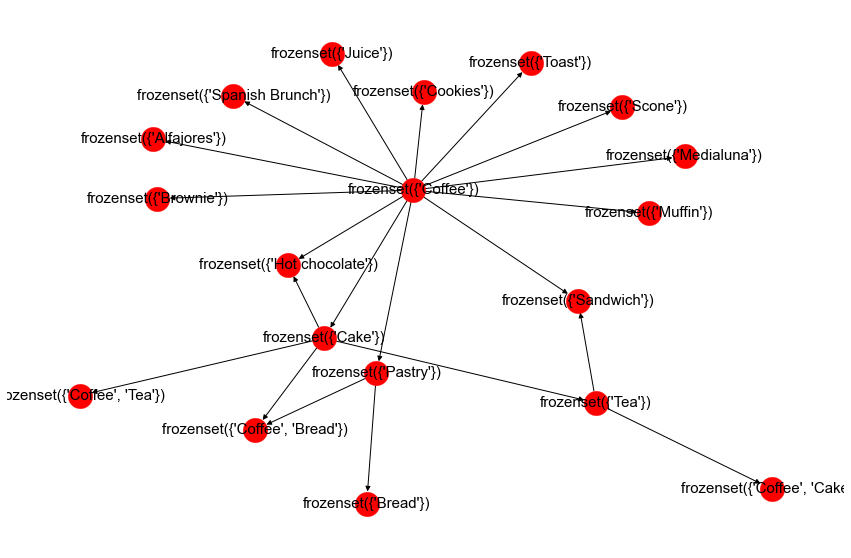

In [36]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,arrows=True,with_labels=True, font_size = 15, node_size = 600, font_color = 'black', node_color = 'red')
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [ ]:
print(len(rules))

# Cà phê là món bán chạy nhất của tiệm bánh này và nó thể hiện sự liên kết với 8 món - bánh ngọt, bánh ngọt, medialuna và bánh sandwich,... Có một số chiến lược mà tiệm bánh có thể áp dụng (nếu chưa sử dụng chúng) để tăng doanh số bán hàng khi xem xét mối liên hệ mà chúng ta đã thấy giữa cà phê và các đối tác của mình. Khuyến mại giảm giá ở một trong các đối tác có thể lôi kéo khách hàng mua cà phê (hoặc ngược lại cũng sẽ hiệu quả). Đặt các mặt hàng này gần quầy gọi cà phê có thể là một chiến lược tốt để thu hút khách hàng mua những thứ này (điều mà chúng ta thấy khá thường xuyên xảy ra ở nhiều tiệm bánh và quán cà phê). Làm thế nào về một số công thức nấu ăn như bánh cà phê hoặc bánh ngọt cà phê? Điều đó sẽ lôi kéo những người yêu thích cà phê và bánh ngọt?

In [ ]:
rules.sort_values('lift', ascending=False)

In [ ]:
fig, ax=plt.subplots(figsize=(20,12))
GA=nx.from_pandas_edgelist(rules2,source='antecedents',target='consequents')
nx.draw(GA,arrows=True,with_labels=True, font_size = 15, node_size = 600, font_color = 'black', node_color = 'red')
plt.show()


In [ ]:
rules2[rules2['antecedents']==frozenset({'Coffee'})].sort_values('confidence', ascending = False)

In [151]:
frequent_itemset3 = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemset3

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [152]:
rules3=association_rules(frequent_itemset3, metric="lift", min_threshold=1.0)
frequent_itemset3['length'] = frequent_itemset3['itemsets'].apply(lambda x: len(x))

In [153]:
print(len(rules3))

8


In [154]:
frequent_itemset3

,support,itemsets,length
0,0.036344,(Alfajores),1
1,0.327205,(Bread),1
2,0.040042,(Brownie),1
3,0.103856,(Cake),1
4,0.478394,(Coffee),1
5,0.054411,(Cookies),1
6,0.039197,(Farm House),1
7,0.058320,(Hot chocolate),1
8,0.038563,(Juice),1
9,0.061807,(Medialuna),1


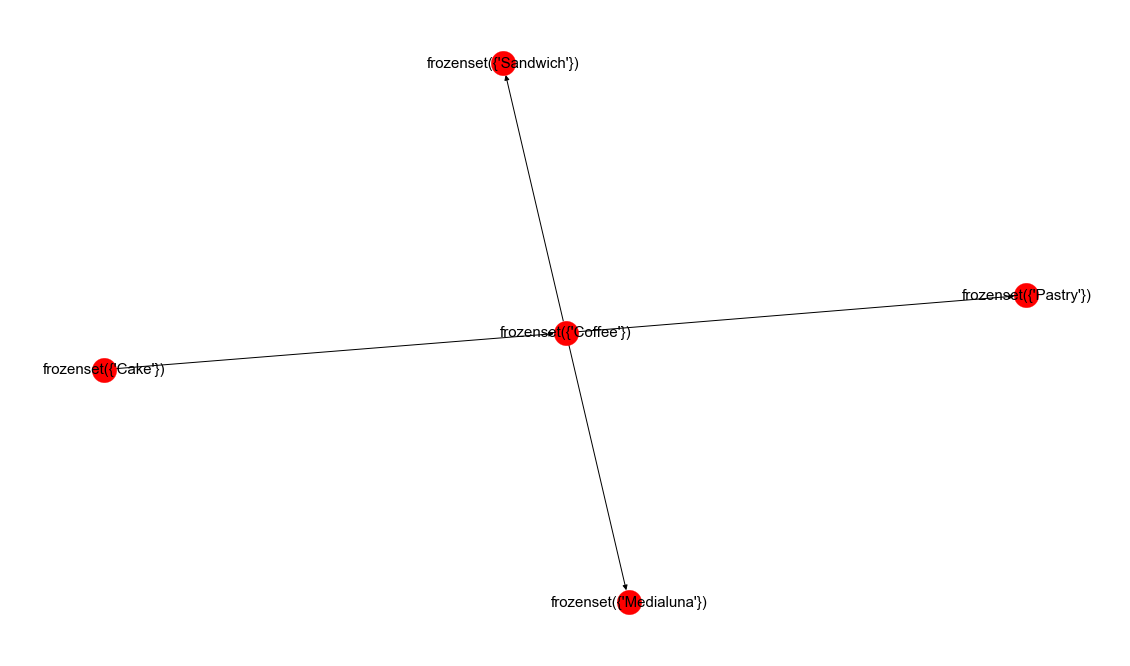

In [155]:
fig, ax=plt.subplots(figsize=(20,12))
GA=nx.from_pandas_edgelist(rules3,source='antecedents',target='consequents')
nx.draw(GA,arrows=True,with_labels=True, font_size = 15, node_size = 600, font_color = 'black', node_color = 'red')
plt.show()